In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [3]:
dataset = pd.DataFrame(df.data)


In [4]:
dataset.columns = df.feature_names

In [5]:
X = dataset
y = df.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [9]:
ridge_regressor = Ridge()

In [10]:
ridge_regressor

Ridge()

In [12]:
parameters = {'alpha':[1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,90]}
ridgecv=GridSearchCV(ridge_regressor, parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [17]:
ridgecv.best_params_
print(ridgecv.best_score_)

-0.5268179966861515


In [18]:
ridge_pred=ridgecv.predict(X_test)

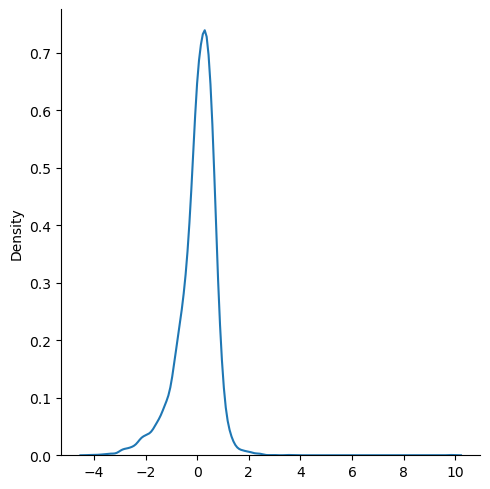

In [19]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')